# Project : Investigating No_Show Appointment Data

## Introduction
     
> The Dataset which we have selected for the analysis is NO_show appointment data. We will be finding out what arethe reasons for the patents for not showing for the appointment. There are many factors to be considered for not showing for the appointment if he/she is a alcoholist, handicap and many more, based on this we will find out what are the key factors responsible for not showing for the booked appointment.


In [2]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data Wrangling and Cleaning of data


we will load the data and will check rows and columns count in data frame

In [3]:
#importing the dataset
df = pd.read_csv('D:/Study/Online courses/udacity/Data Anlayst/project 2/noshowappointments-kagglev2-may-2016.csv')

In [4]:
df.shape

(110527, 14)

This dataset contains 110527 rows and 14 columns. Next we will get the basic info about the data set and print few rows of the data


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
print(df.head())

      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589978e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262962e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679512e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841186e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:00:00Z    8  PONTAL DE CAMBURI            0             0   
4  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             1   

   Diabetes  Alcoholism  Handcap  SMS_received No-show  
0         0           0        0             0      No  
1         0           0        0      

 Their are no Null values present in the data set.

#### correcting the inconsistencies in the data

Converting the PatientID to int
<br>Converting the AppointmentDay and ScheduleDay to date time
<br>Renaming the columns Handcap, No-show, SMS_received,Hipertension

In [7]:
# Convert PatientId from Float to Integer
df['PatientId'] = df['PatientId'].astype('int64')

# Convert ScheduledDay and AppointmentDay from 'object' type to 'datetime64[ns]'
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

# Rename incorrect column names.
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap',
                        'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

In [8]:
# checking if all the changes were made
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  int64         
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hypertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handicap        110527 non-null  int64         
 12  SMSReceived     110527 non-null  int64         
 13  NoShow          110527 non-null  object        
dtypes: datetime64[ns](2), int64(9), obje

In [9]:
df = df[df.Age >= 0]

## Exploratory Data Analysis

From the above Info of the DataFrame and the sample data we can see that there are 14 columns in total.

There are 13 Independent Variables -> ['PatientId' 'AppointmentID' 'Gender' 'ScheduledDay' 'AppointmentDay' 'Age' 'Neighbourhood' 'Scholarship' 'Hypertension' 'Diabetes' 'Alcoholism' 'Handicap' 'SMSReceived']
<br>The Dependent Variable is -> ['NoShow']

<br>Below, we will drop 'PatientId' and 'AppointmentID' from the dataframe as they are just some system genrated numbers and shouldn't be used for predicting the dependent variable.

In [10]:
# Drop 'PatientId' and 'AppointmentID' as they are just some system genrated numbers.
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [11]:
# Print Unique Values
print("Unique Values in Gender: {}".format(df.Gender.unique()))
print("Unique Values in Scholarship: {}".format(df.Scholarship.unique()))
print("Unique Values in Hypertension {}".format(df.Hypertension.unique()))
print("Unique Values in Diabetes: {}".format(df.Diabetes.unique()))
print("Unique Values in Alcoholism: {}".format(df.Alcoholism.unique()))
print("Unique Values in Handicap: {}".format(df.Handicap.unique()))
print("Unique Values in SMSReceived: {}".format(df.SMSReceived.unique()))

Unique Values in Gender: ['F' 'M']
Unique Values in Scholarship: [0 1]
Unique Values in Hypertension [1 0]
Unique Values in Diabetes: [0 1]
Unique Values in Alcoholism: [0 1]
Unique Values in Handicap: [0 1 2 3 4]
Unique Values in SMSReceived: [0 1]


only handicap column contains 4 values and others contains Yes or No type values so we convert it to objects and summary of the data

In [12]:
#summary of the data
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [13]:
# defining function
def convert(variable):
    data =df[variable].astype('object')
    return data

In [14]:
df['Scholarship'] = convert('Scholarship')
df['Hypertension'] = convert('Hypertension')
df['Diabetes'] = convert('Diabetes')
df['Alcoholism'] = convert('Alcoholism')
df['Handicap'] = convert('Handicap')
df['SMSReceived'] = convert('SMSReceived')

### Research Question 1: what is the overall percentage of people Show up vs No show up

In [15]:
print("NoShow and Show Count of Patients\n")
print(df.groupby(['NoShow']).size())

NoShow and Show Count of Patients

NoShow
No     88207
Yes    22319
dtype: int64


In [16]:
print("\nPercentage of NoShow and Show of Patients\n")
show = df.groupby(['NoShow']).size()[0]/(df.groupby(['NoShow']).size()[0]+df.groupby(['NoShow']).size()[1])
print("Percent of Patients who Showed Up: {:.2f}% ".format(show*100))
noshow = df.groupby(['NoShow']).size()[1]/(df.groupby(['NoShow']).size()[0]+df.groupby(['NoShow']).size()[1])
print("Percent of Patients who Did Not Showed Up: {:.2f}%".format(noshow*100))


Percentage of NoShow and Show of Patients

Percent of Patients who Showed Up: 79.81% 
Percent of Patients who Did Not Showed Up: 20.19%


here we can have a clear understanding of patitent who Show up vs No show
<br>Below we can see that out of 110,500 patients around 88,000 of them have showed up and that's around 80%.

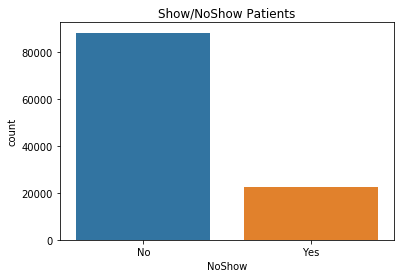

In [17]:
ax = sns.countplot(x=df.NoShow, data=df)
ax.set_title("Show/NoShow Patients")
plt.show()

Below we can see that out of the 88,000 patients that have showed up, around 57,000 of them are Females and 31,000 are Males.
Of the 22,500 patients that haven't come for the visit around 15,000 are Females and 7,500 are Males
The ratio of Females to Males that have showed up looks simiar to those who haven't come for a visit.

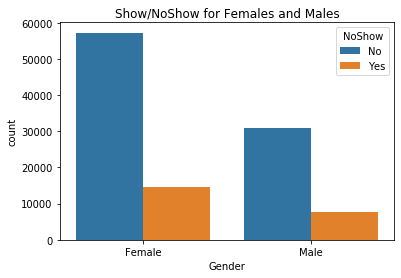

In [18]:
ax = sns.countplot(x=df.Gender, hue=df.NoShow, data=df)
ax.set_title("Show/NoShow for Females and Males")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

Distribution of age 

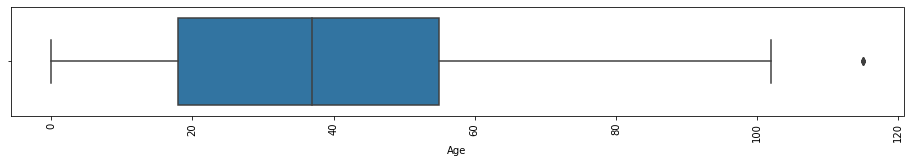

In [19]:
plt.figure(figsize=(16,2))
plt.xticks(rotation=90)
_ = sns.boxplot(x=df.Age)

### Research Question 2: To find out how many no of appointments book for age group

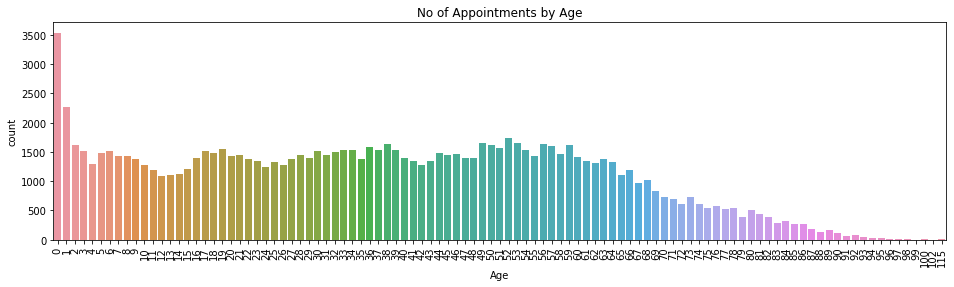

In [20]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.Age)
ax.set_title("No of Appointments by Age")
plt.show()

From the above Histogram we can see that there are peaks for the Infants and then the distribution starts to be uniform. Later, after the Age of around 60 we see a right-skewed distribution.

### Research Question 3: On which Day No of  Appoinments Schedule by the people for going to hospital.

<br>Get Day of the Week for ScheduledDay and AppointmentDay to see if there are many 'NoShows' over the weekends. Week for ScheduledDay and AppointmentDay also helps us to see if there is a particular pattern where most patients are coming for a visit.

In [23]:
# Get Day of the Week for ScheduledDay and AppointmentDay
df['ScheduledDay_DOW'] = df['ScheduledDay'].dt.day_name()
df['AppointmentDay_DOW'] = df['AppointmentDay'].dt.day_name()

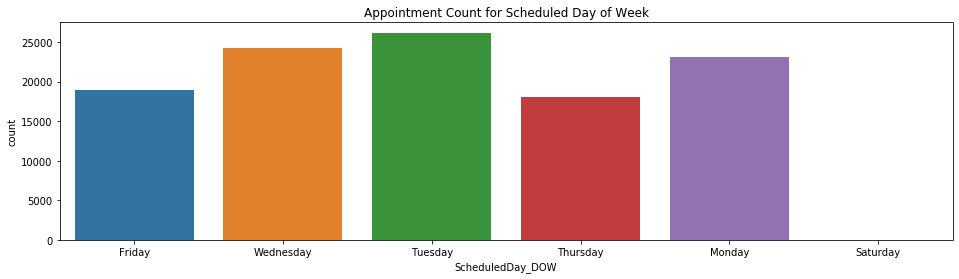

In [24]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.ScheduledDay_DOW)
ax.set_title("Appointment Count for Scheduled Day of Week")
plt.show()

Looks like the call center that takes the appointments doesn't work over the weekends as we do not see any appointments taken on Saturday and Sunday. The most appointment is booked on tuesday

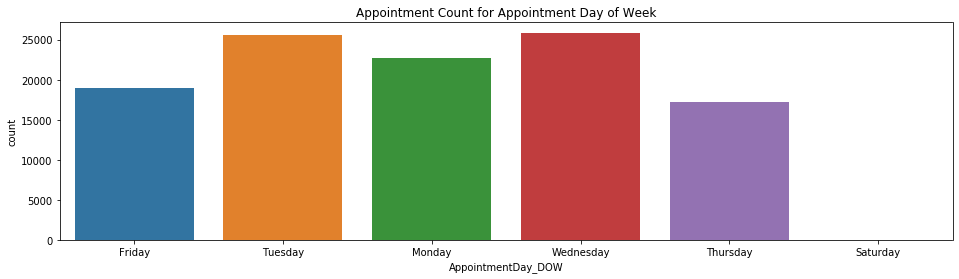

In [25]:
plt.figure(figsize=(16,4))
ax = sns.countplot(x=df.AppointmentDay_DOW)
ax.set_title("Appointment Count for Appointment Day of Week")
plt.show()

There looks like a pattern with the appointments from the above visualizations. Also, we can see there are no appointments on Saturday and Sunday. So, AppointmentDay_DOW could help in determining on which day most patient visits the hospital after taking an appointment.

### Conclusion

 #### Limitations:
The data set explored in this analysis was over a 6 month period. Data for a longer timeframe would provide insight into how seasonality and holidays impact show rates.

Overlaying external data sources onto this data set such as traffic, weather, or geographic data could allow us to better understand influencers on no-show rates. Right now, the analysis is limited to general correlations.

their are some illogical data such as patients with age 0 or less.

#### Findings
<br> After doing the EDA it has been found that the total percentage of people showed up for the appoinment is around 80% and the remaining 20 percent didn't show up for the check up. The most appointments were booked for the infants, on tuesday most appointments were booked but the busiest day considered were tuesday and wednesday in hospital where more people showed up.  